In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import ads8684_fast_readout

In [117]:
if 'ads' in globals():
    ads.close()

In [118]:
port = 'com8'
ads = ads8684_fast_readout.Ads8684_fast_readout(port)

In [119]:
ads.reset()

{'fsamp': 500000,
 'npts': 10,
 'maxpts': 32768,
 'average': 0,
 'stdev': 0,
 'chans': [1],
 'ranges': [0],
 'getRanges': [0]}

In [120]:
ads.status()

{'fsamp': 500000,
 'npts': 10,
 'maxpts': 32768,
 'average': 0,
 'stdev': 0,
 'chans': [1],
 'ranges': [0],
 'getRanges': [0]}

{'fsamp': 500000, 'npts': 100, 'maxpts': 32768, 'average': 33690.29, 'stdev': 920.2339191, 'chans': [0, 1], 'ranges': [1, 1], 'getRanges': [0, 0]}


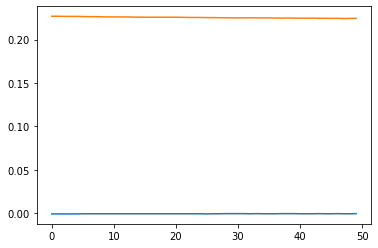

In [122]:
ads.chans([0, 1])
ads.ranges([1, 1])
print(ads.status())
ya = ads.readBinaryMode(100)
plt.plot(ya[0])
plt.plot(ya[1])

In [7]:
result = ads.readBinaryMode(100)

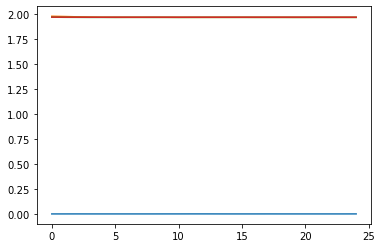

In [8]:
_ = [plt.plot(y) for y in result]

In [9]:
ads.chans([0])
ads.ranges([0])

{'fsamp': 500000,
 'npts': 100,
 'maxpts': 32768,
 'average': 42224.05,
 'stdev': 5460.963337,
 'chans': [0],
 'ranges': [0]}

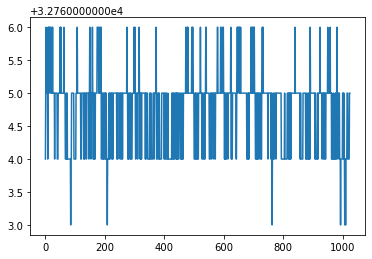

read noise (adu rms) 0.5735108040255078


In [15]:
y = ads.readBinaryMode(1024, volts = False)
plt.plot(y[0])
plt.show()
print('read noise (adu rms)', np.std(y[0]))

In [30]:
for r in range(5):
    ads.ranges([r])
    y = ads.readBinaryMode(1024, volts = False)
    print('range', r, 'read noise (adu RMS)', np.std(y[0]))

range 0 read noise (adu RMS) 0.6232083389429471
range 1 read noise (adu RMS) 0.6237345281910525
range 2 read noise (adu RMS) 0.6067770328668893
range 3 read noise (adu RMS) 0.614839748190201
range 4 read noise (adu RMS) 0.6341132464907195


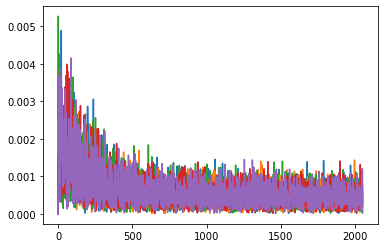

In [28]:
for r in range(5):
    y = ads.readBinaryMode(4096, volts = True)[0]
    plt.plot(np.abs(np.fft.rfft(y - np.average(y))))